In [2]:
true_labels= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [1]:
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 2, 2, 2,
       1, 2, 5, 2, 3, 2, 5, 2, 5, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       3, 3, 4, 4, 4, 4, 8, 4, 3, 4, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 0,
       6, 1, 6, 1, 6, 1, 7, 6, 5, 7, 7, 4, 7, 7, 7, 7, 8, 5, 8, 8, 8, 8,
       8, 8, 8, 5, 8, 8, 8, 8, 8, 9, 6, 9, 9, 9, 3, 9, 9, 9, 9]

In [3]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_labels, true_labels)

In [4]:
cm

array([[10,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  7,  1,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 13,  2,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  8,  0,  0,  1,  0,  0],
       [ 0,  0,  2,  2,  0,  7,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8]])

Text(95.5815972222222, 0.5, 'True Class')

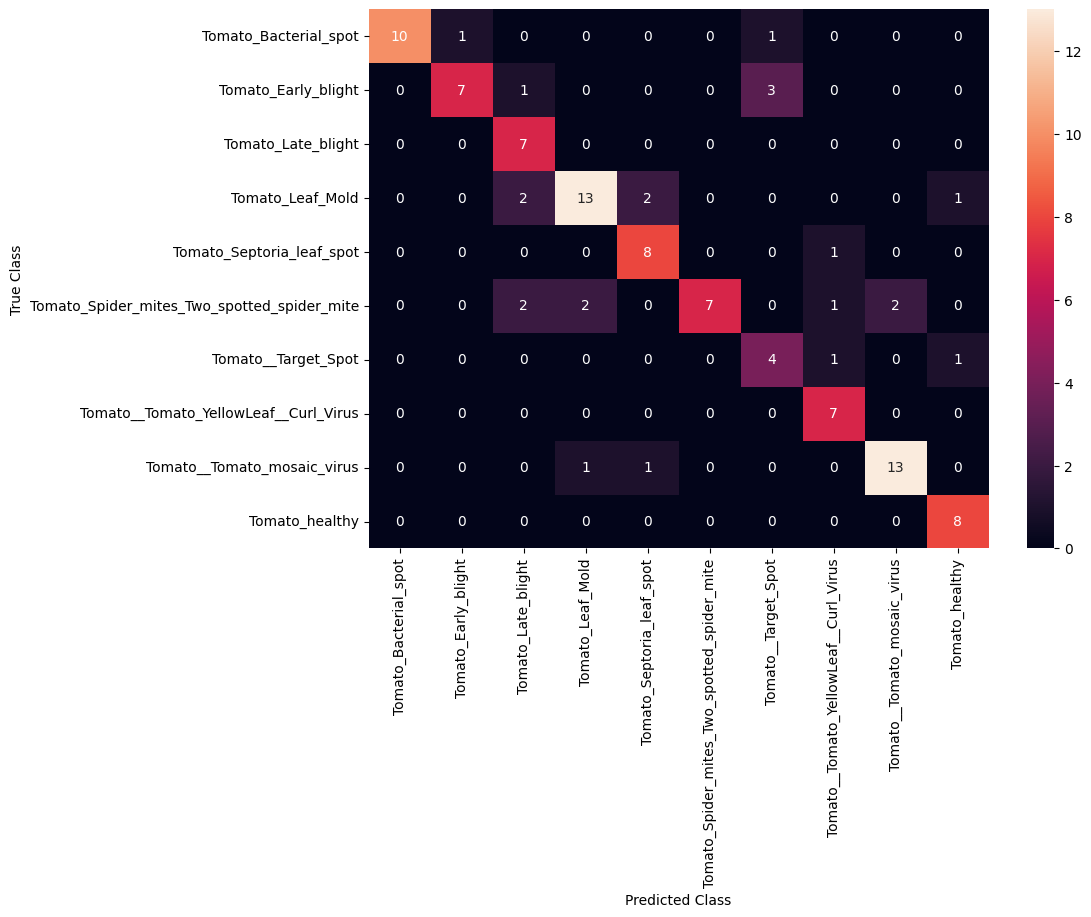

In [7]:
import matplotlib.pylab as plt
import seaborn as sn
labels = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print('Precision: ', precision)
print('Recall: ', recall)

l = len(true_labels)
acc = sum([predicted_labels[i] == true_labels[i] for i in range(l)]) / l
print('Accuracy: ', acc)

Precision:  0.8114141414141415
Recall:  0.7864772727272726
Accuracy:  0.7850467289719626


In [9]:
from sklearn.metrics import classification_report
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.64      0.88      0.74         8
           2       1.00      0.58      0.74        12
           3       0.72      0.81      0.76        16
           4       0.89      0.73      0.80        11
           5       0.50      1.00      0.67         7
           6       0.67      0.50      0.57         8
           7       1.00      0.70      0.82        10
           8       0.87      0.87      0.87        15
           9       1.00      0.80      0.89        10

    accuracy                           0.79       107
   macro avg       0.81      0.79      0.78       107
weighted avg       0.83      0.79      0.79       107



In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy=",accuracy_score(true_labels,predicted_labels))
print("F1 Score=",f1_score(true_labels,predicted_labels, average="macro"))
print("Precision=",precision_score(true_labels,predicted_labels, average="macro"))
print("Recall=",recall_score(true_labels,predicted_labels, average="macro"))

Accuracy= 0.7850467289719626
F1 Score= 0.7764661207385666
Precision= 0.8114141414141415
Recall= 0.7864772727272726


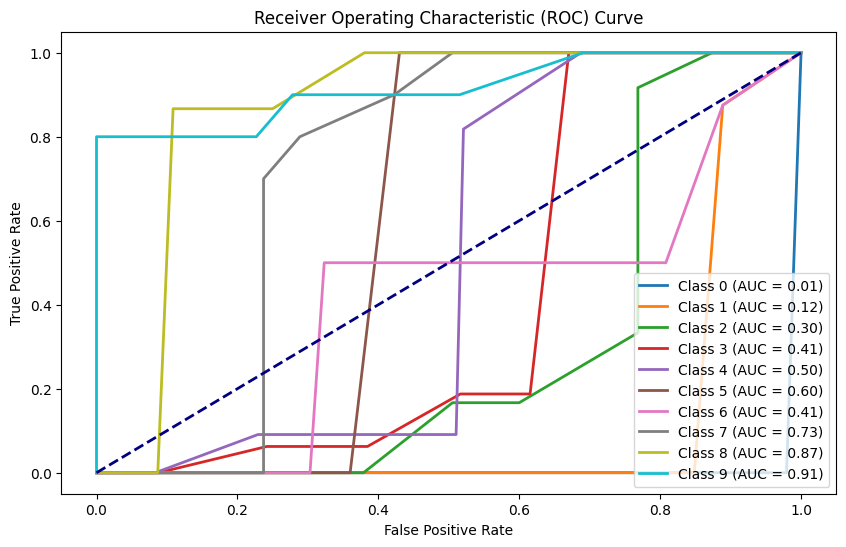

In [27]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(binarized_true_labels[:, i], predicted_labels)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



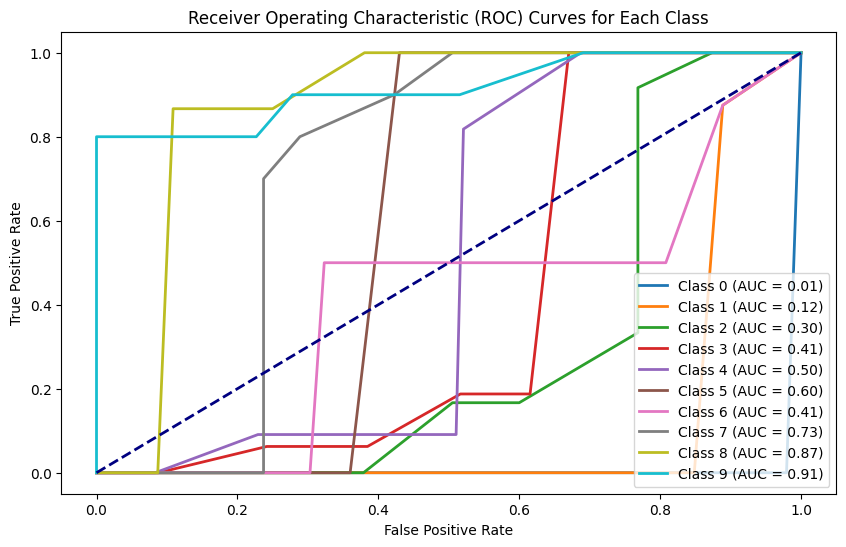

In [30]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_true_labels[:, i], predicted_labels)  # Changed this line
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

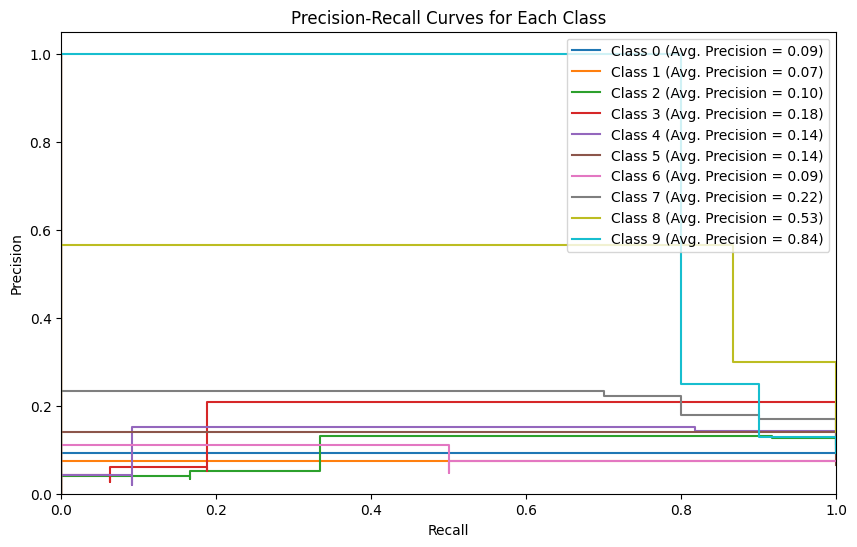

In [32]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

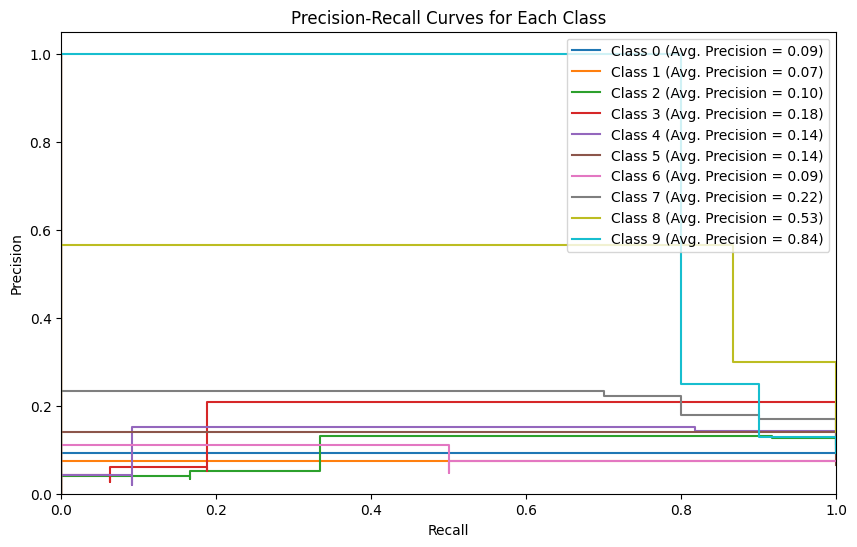

In [33]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))
binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

In [16]:
acc= [0.2881152331829071,
 0.6206482648849487,
 0.6950780153274536,
 0.8019207715988159,
 0.7935174107551575,
 0.8115246295928955,
 0.8907563090324402,
 0.8523409366607666,
 0.8643457293510437,
 0.9219687581062317,
 0.9267706871032715,
 0.8979591727256775,
 0.9219687581062317,
 0.9363745450973511,
 0.9339736104011536,
 0.9399759769439697,
 0.9267706871032715,
 0.9015606045722961,
 0.942376971244812,
 0.9495798349380493,
 0.9567826986312866,
 0.9435774087905884,
 0.924369752407074,
 0.9123649597167969,
 0.9075630307197571,
 0.813925564289093,
 0.9135653972625732,
 0.9015606045722961,
 0.79111647605896,
 0.842737078666687,
 0.9207683205604553,
 0.9135653972625732,
 0.9435774087905884,
 0.942376971244812,
 0.9435774087905884,
 0.9555822610855103,
 0.9783913493156433,
 0.9747899174690247,
 0.9735894203186035,
 0.9807923436164856,
 0.9615846276283264,
 0.9687874913215637,
 0.9663865566253662,
 0.9771908521652222,
 0.9747899174690247,
 0.9723889827728271,
 0.9747899174690247,
 0.981992781162262,
 0.8739495873451233,
 0.8463385105133057,
 0.9087635278701782,
 0.8439375758171082,
 0.918367326259613,
 0.8595438003540039,
 0.9291716814041138,
 0.9567826986312866,
 0.9543817639350891,
 0.9615846276283264,
 0.9771908521652222,
 0.9747899174690247,
 0.9699879884719849,
 0.971188485622406,
 0.9759904146194458,
 0.9651860594749451,
 0.9639856219291687,
 0.971188485622406,
 0.9723889827728271,
 0.9771908521652222,
 0.9723889827728271,
 0.9747899174690247,
 0.9831932783126831,
 0.9783913493156433,
 0.9867947101593018,
 0.9831932783126831,
 0.9771908521652222,
 0.9927971363067627,
 0.9783913493156433,
 0.9831932783126831,
 0.9915966391563416,
 0.9783913493156433,
 0.9807923436164856,
 0.9903961420059204,
 0.9831932783126831,
 0.9783913493156433,
 0.981992781162262,
 0.981992781162262,
 0.9795918464660645,
 0.9795918464660645,
 0.9771908521652222,
 0.9735894203186035,
 0.9879952073097229,
 0.9915966391563416,
 0.9807923436164856,
 0.9051620364189148,
 0.9099639654159546,
 0.918367326259613,
 0.9543817639350891,
 0.9627851247787476,
 0.9651860594749451,
 0.9687874913215637]

In [18]:
val_acc=[0.4392523467540741,
 0.5514018535614014,
 0.6261682510375977,
 0.7009345889091492,
 0.5981308221817017,
 0.7009345889091492,
 0.672897219657898,
 0.6915887594223022,
 0.6168224215507507,
 0.6822429895401001,
 0.6355140209197998,
 0.7009345889091492,
 0.7196261882781982,
 0.7289719581604004,
 0.7009345889091492,
 0.7102803587913513,
 0.7383177280426025,
 0.6542056202888489,
 0.6542056202888489,
 0.7196261882781982,
 0.7570093274116516,
 0.7289719581604004,
 0.6822429895401001,
 0.663551390171051,
 0.4579439163208008,
 0.6822429895401001,
 0.6915887594223022,
 0.7102803587913513,
 0.5233644843101501,
 0.7289719581604004,
 0.7570093274116516,
 0.7102803587913513,
 0.6915887594223022,
 0.7196261882781982,
 0.6915887594223022,
 0.7102803587913513,
 0.7102803587913513,
 0.7383177280426025,
 0.7757009267807007,
 0.7757009267807007,
 0.7476635575294495,
 0.7850467562675476,
 0.7102803587913513,
 0.7102803587913513,
 0.7289719581604004,
 0.7570093274116516,
 0.7570093274116516,
 0.7196261882781982,
 0.7943925261497498,
 0.7289719581604004,
 0.7289719581604004,
 0.7289719581604004,
 0.7383177280426025,
 0.6355140209197998,
 0.7570093274116516,
 0.7663551568984985,
 0.7663551568984985,
 0.7943925261497498,
 0.8317757248878479,
 0.7943925261497498,
 0.8037382960319519,
 0.7943925261497498,
 0.7757009267807007,
 0.7757009267807007,
 0.7757009267807007,
 0.8130841255187988,
 0.8317757248878479,
 0.7757009267807007,
 0.8037382960319519,
 0.8130841255187988,
 0.822429895401001,
 0.7476635575294495,
 0.7850467562675476,
 0.8317757248878479,
 0.7850467562675476,
 0.84112149477005,
 0.7476635575294495,
 0.7570093274116516,
 0.7850467562675476,
 0.8037382960319519,
 0.7663551568984985,
 0.7570093274116516,
 0.7383177280426025,
 0.7850467562675476,
 0.7757009267807007,
 0.7570093274116516,
 0.7943925261497498,
 0.7663551568984985,
 0.7476635575294495,
 0.7570093274116516,
 0.7850467562675476,
 0.7663551568984985,
 0.7570093274116516,
 0.7289719581604004,
 0.663551390171051,
 0.7383177280426025,
 0.7476635575294495,
 0.7943925261497498,
 0.7757009267807007,
 0.7476635575294495]

In [15]:
loss=[13.325613021850586,
 3.600862979888916,
 2.5918240547180176,
 1.1848183870315552,
 1.1888706684112549,
 1.0314077138900757,
 0.5489659905433655,
 0.6939651370048523,
 0.6845859885215759,
 0.3964543342590332,
 0.30920538306236267,
 0.5242904424667358,
 0.36776015162467957,
 0.27704256772994995,
 0.3283423185348511,
 0.31849396228790283,
 0.3418947756290436,
 0.569939374923706,
 0.33307620882987976,
 0.27835360169410706,
 0.2266872674226761,
 0.21021755039691925,
 0.368541955947876,
 0.5430874228477478,
 0.7808560132980347,
 2.214010715484619,
 0.6154918670654297,
 1.2583692073822021,
 3.6175506114959717,
 2.2195072174072266,
 0.9129277467727661,
 0.7379509210586548,
 0.358755886554718,
 0.46654364466667175,
 0.4780631959438324,
 0.2943820357322693,
 0.1814875602722168,
 0.1390780806541443,
 0.14396443963050842,
 0.15475991368293762,
 0.21999569237232208,
 0.13691464066505432,
 0.270939439535141,
 0.1323772519826889,
 0.16639195382595062,
 0.12958963215351105,
 0.16339141130447388,
 0.07135339826345444,
 1.3965798616409302,
 3.921333074569702,
 1.7955535650253296,
 3.348057270050049,
 0.942531406879425,
 3.2512969970703125,
 0.7490376234054565,
 0.4259355366230011,
 0.4291885197162628,
 0.362434059381485,
 0.15006709098815918,
 0.2290034294128418,
 0.28832343220710754,
 0.27365610003471375,
 0.15096452832221985,
 0.28600403666496277,
 0.25556790828704834,
 0.13826408982276917,
 0.21582457423210144,
 0.19801299273967743,
 0.2599634528160095,
 0.15366432070732117,
 0.08793149143457413,
 0.12882493436336517,
 0.0878424122929573,
 0.09139121323823929,
 0.16428515315055847,
 0.033954862505197525,
 0.13278962671756744,
 0.10799658298492432,
 0.11114906519651413,
 0.17129705846309662,
 0.08002638071775436,
 0.08033498376607895,
 0.15062165260314941,
 0.16161313652992249,
 0.12412774562835693,
 0.1445261836051941,
 0.16331259906291962,
 0.12164060026407242,
 0.17554160952568054,
 0.20015418529510498,
 0.11915560066699982,
 0.08636000007390976,
 0.23176966607570648,
 2.918762445449829,
 1.875838279724121,
 1.1092970371246338,
 0.4177502989768982,
 0.44904378056526184,
 0.3320082128047943,
 0.4130845069885254]

In [17]:
val_loss=[7.297307014465332,
 3.8161563873291016,
 2.654794931411743,
 1.9893434047698975,
 3.1555564403533936,
 2.3908097743988037,
 2.0577309131622314,
 2.487281560897827,
 3.720731735229492,
 2.346190929412842,
 2.3072845935821533,
 2.286191940307617,
 1.9591262340545654,
 2.368380069732666,
 2.4765310287475586,
 1.877945065498352,
 2.9199612140655518,
 3.0312607288360596,
 2.4883947372436523,
 2.3716063499450684,
 2.2828922271728516,
 2.573551654815674,
 3.5556766986846924,
 3.201808214187622,
 9.774518013000488,
 4.967926979064941,
 4.5415239334106445,
 4.615878582000732,
 8.968605041503906,
 4.29362154006958,
 4.37585973739624,
 4.679457187652588,
 5.18767786026001,
 4.793497562408447,
 5.4793701171875,
 4.482537746429443,
 4.335867404937744,
 4.145114421844482,
 3.546233892440796,
 3.97835636138916,
 4.0289082527160645,
 3.9174139499664307,
 4.799831867218018,
 4.514102458953857,
 4.474385738372803,
 4.139613151550293,
 4.513453960418701,
 4.857227802276611,
 3.6555843353271484,
 5.521287441253662,
 6.119837284088135,
 6.742478370666504,
 5.851759910583496,
 7.541748046875,
 6.406335353851318,
 5.286689758300781,
 5.843651294708252,
 6.356812000274658,
 4.884609699249268,
 4.76684045791626,
 5.663133144378662,
 5.5358099937438965,
 6.294958591461182,
 6.116239547729492,
 5.257260799407959,
 4.946338176727295,
 4.822159290313721,
 5.896518707275391,
 5.844467639923096,
 4.523957252502441,
 5.16212797164917,
 6.194212913513184,
 5.783266067504883,
 5.26849889755249,
 5.630887985229492,
 4.954953670501709,
 5.978157043457031,
 5.0909318923950195,
 5.7918596267700195,
 5.207319736480713,
 5.523728847503662,
 5.6876983642578125,
 7.418752670288086,
 5.819009780883789,
 6.495741367340088,
 5.650335788726807,
 5.7522759437561035,
 5.571417808532715,
 7.152276515960693,
 6.312920570373535,
 5.430105209350586,
 5.459658145904541,
 5.482593536376953,
 10.549933433532715,
 9.75106430053711,
 6.95743989944458,
 8.031922340393066,
 5.580029010772705,
 7.117887020111084,
 7.010520935058594]

In [19]:
EPOCHS=100

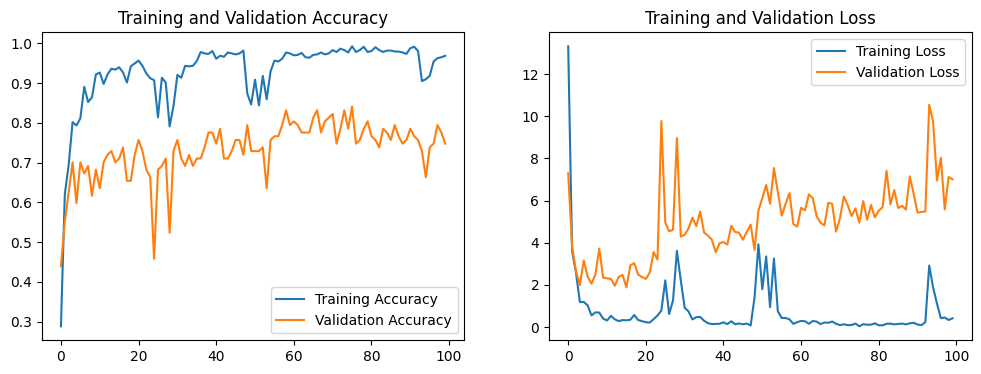

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()